In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import ace_tools_open as tools
import matplotlib.pyplot as plt
import folium
plt.rcParams['font.family'] = 'Nanum Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [3]:
file_path = "/Users/leejeje/Desktop/2024 겨울학기/Data Science Lab/EDA Project/Datasets/Data_loss/final.xlsx"
admission_data = pd.read_excel(file_path)
file_path = "/Users/leejeje/Desktop/2024 겨울학기/Data Science Lab/EDA Project/Datasets/Data/출생아수.csv"
birth_data = pd.read_csv(file_path)

In [4]:
tools.display_dataframe_to_user(name="Final Merged Data", dataframe=admission_data)

Final Merged Data


In [5]:
tools.display_dataframe_to_user(name="Final Merged Data", dataframe=birth_data)

Final Merged Data


In [6]:
y = np.array([561050, 546960, 540472, 540593, 535093, 499877, 497405, 494312, 501568])

df = birth_data.loc[0,:]

X_1 = df.iloc[1:10].values
X_2 = df.iloc[2:11].values
X_3 = df.iloc[3:12].values

X = np.column_stack([X_1, X_2, X_3])

In [7]:
model = LinearRegression()
model.fit(X, y)

# 결과 출력
print("회귀 계수:", model.coef_)
print("절편:", model.intercept_)
print("R² 점수:", model.score(X, y))

회귀 계수: [ 0.28244179 -0.09176147  0.12416691]
절편: 350450.77424231364
R² 점수: 0.9403832155136267


In [8]:
X_1_future = df.iloc[8:-2].values
X_2_future = df.iloc[9:-1].values
X_3_future = df.iloc[10:].values

# X_future 데이터 결합
X_future = np.column_stack([X_1_future, X_2_future, X_3_future])

# 미래 예측 수행
y_future_pred = model.predict(X_future)

# 예측값 출력
print(y_future_pred)

[501000.76709757 494594.74890341 490305.64961024 503258.66199321
 499597.82843948 491466.66052085 500167.82192552 493285.95460756
 501324.81136837 488205.00831601 483647.69104397 481424.77008897
 472941.66073625 459092.93367058 448800.21518188 443302.26149107
 434401.22848821 429740.56518892]


In [9]:
result = np.concatenate((y, y_future_pred))
len(result)
total_df = result

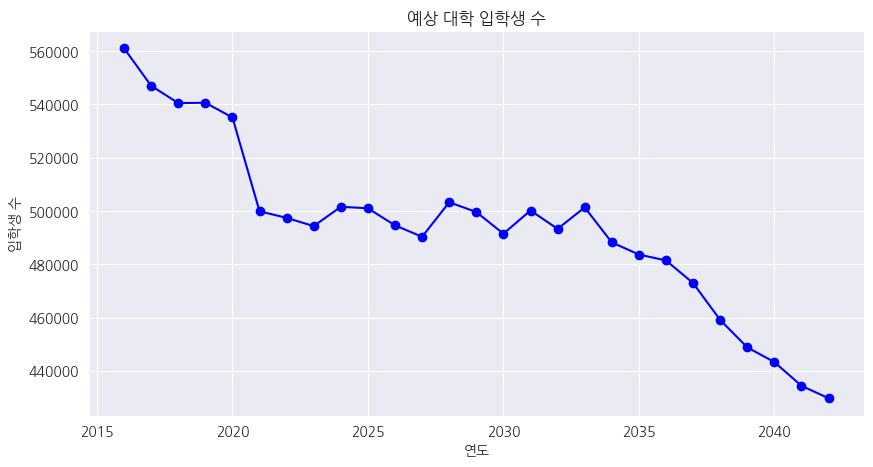

In [10]:
years = list(range(2016, 2016 + len(result))) 

# 그래프 생성
plt.figure(figsize=(10, 5))
plt.plot(years, result, marker='o', linestyle='-', color='b')

# 제목 및 축 레이블 추가
plt.title("예상 대학 입학생 수")
plt.xlabel("연도")
plt.ylabel("입학생 수")

# 그리드 추가
plt.grid(True)

# 그래프 표시
plt.show()

In [11]:
df_sido_year_sum = admission_data.groupby(['시도', '연도'])[['입학자수', '입학정원']].sum().reset_index()
tools.display_dataframe_to_user(name="시도별 입학자수 및 입학정원 합계", dataframe=df_sido_year_sum)

시도별 입학자수 및 입학정원 합계


In [12]:
sido_models = {}
sido_predictions = {}

df = birth_data.loc[0,:]  # 출생자 수 데이터

# 입력 데이터 (독립 변수) 생성
X_1 = df.iloc[1:10].astype(float).values
X_2 = df.iloc[2:11].astype(float).values
X_3 = df.iloc[3:12].astype(float).values

# 다중 선형 회귀 모델의 입력 변수 구성
X = np.column_stack([X_1, X_2, X_3])

for sido, group in df_sido_year_sum.groupby('시도'):
    group = group.sort_values('연도')

    # 2016년부터 2024년까지의 입학자수 데이터 필터링
    filtered_group = group[(group['연도'] >= 2016) & (group['연도'] <= 2024)][['연도', '입학자수']]
    
    # y 값 설정 (시도별 입학자수)
    y = filtered_group['입학자수'].values

    # 학습 데이터 개수가 부족하면 건너뜀
    if len(y) < 9:
        print(f"{sido} 데이터 부족으로 건너뜀")
        continue
    
    # 다중 선형 회귀 모델 생성 및 학습
    model = LinearRegression()
    model.fit(X, y)

    # 모델 저장
    sido_models[sido] = model
    
    r2 = model.score(X, y)

    # Adjusted R² 점수 계산
    n = len(y)  # 샘플 수
    k = X.shape[1]  # 독립 변수 개수 (5개)
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))


    # 미래 예측을 위한 X_future 생성
    X_1_future = df.iloc[8:-2].astype(float).values
    X_2_future = df.iloc[9:-1].astype(float).values
    X_3_future = df.iloc[10:].astype(float).values

    X_future = np.column_stack([X_1_future, X_2_future, X_3_future])

    # 예측 수행
    y_future_pred = model.predict(X_future)

    # 예측값 저장
    sido_predictions[sido] = y_future_pred

    print(f"=== {sido} 회귀 분석 결과 ===")
    print("회귀 계수:", model.coef_)
    print("절편:", model.intercept_)
    print("R² 점수:", model.score(X, y))
    print(f"Adjusted R² 점수: {adjusted_r2:.4f}")
    print(f"{sido}의 y값:", y)
    print(f"{sido}의 미래 예측값:", y_future_pred)
    print("=========================")

=== 강원 회귀 분석 결과 ===
회귀 계수: [ 0.02358515 -0.00417552  0.0097957 ]
절편: 4965.626164471963
R² 점수: 0.9735936613769197
Adjusted R² 점수: 0.9577
강원의 y값: [24206. 23439. 22752. 22567. 21622. 18986. 18625. 18482. 18686.]
강원의 미래 예측값: [18808.21684872 18292.98578608 18109.67657903 19095.51241656
 18701.93587894 18110.61736504 18833.40844565 18332.61462716
 18836.77362533 17735.94488393 17384.22788759 17114.16831132
 16254.49778439 15003.97961049 14077.67321808 13519.52299752
 12741.70397038 12323.82356282]
=== 경기 회귀 분석 결과 ===
회귀 계수: [ 0.05384974 -0.05802999  0.05100942]
절편: 73984.42969310097
R² 점수: 0.5631019043306078
Adjusted R² 점수: 0.3010
경기의 y값: [104839. 101927. 102112. 103103. 101455.  91917.  91223.  98944. 100792.]
경기의 미래 예측값: [97254.29893503 96735.72273122 93245.84261653 96393.9498092
 97241.1630203  94694.37180119 96672.13037114 93506.81528455
 96961.13186364 94582.68223916 92713.20571913 92268.64934642
 91770.06517941 89724.15706716 87911.17859626 87770.85861166
 86240.13120053 85288.96109208

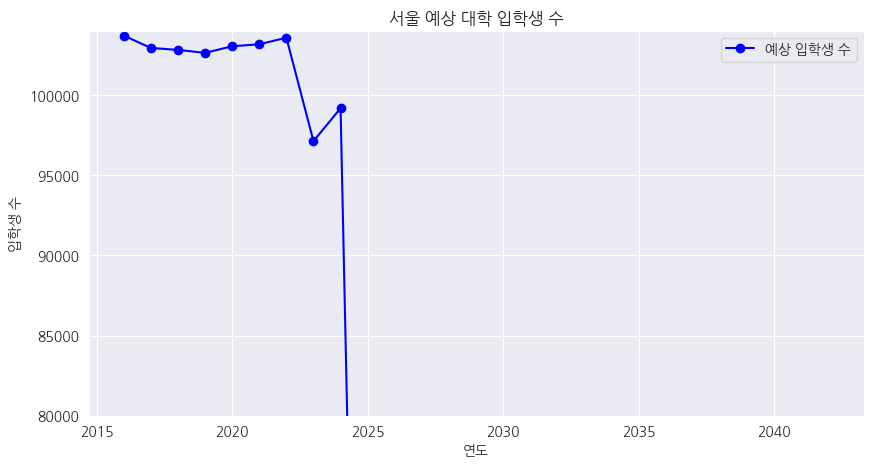

In [39]:
y_actual = df_sido_year_sum[(df_sido_year_sum['시도'] == '서울') & (df_sido_year_sum['연도'] >= 2016)]['입학자수'].values

# 예측 결과와 실제 데이터를 결합
result = np.concatenate((y_actual, sido_predictions[sido]))

years = list(range(2016, 2016 + len(result)))


# 그래프 생성
plt.figure(figsize=(10, 5))
plt.plot(years, result, marker='o', linestyle='-', color='b', label="예상 입학생 수")

# y축 범위 설정
plt.ylim(80000, 104000)
# 제목 및 축 레이블 추가
plt.title(f"{'서울'} 예상 대학 입학생 수")
plt.xlabel("연도")
plt.ylabel("입학생 수")

# 그리드 추가
plt.grid(True)
plt.legend()
plt.show()

=== 강원 회귀 분석 결과 ===
회귀 계수: [ 0.02358515 -0.00417552  0.0097957 ]
절편: 4965.626164471963
R² 점수: 0.9735936613769197


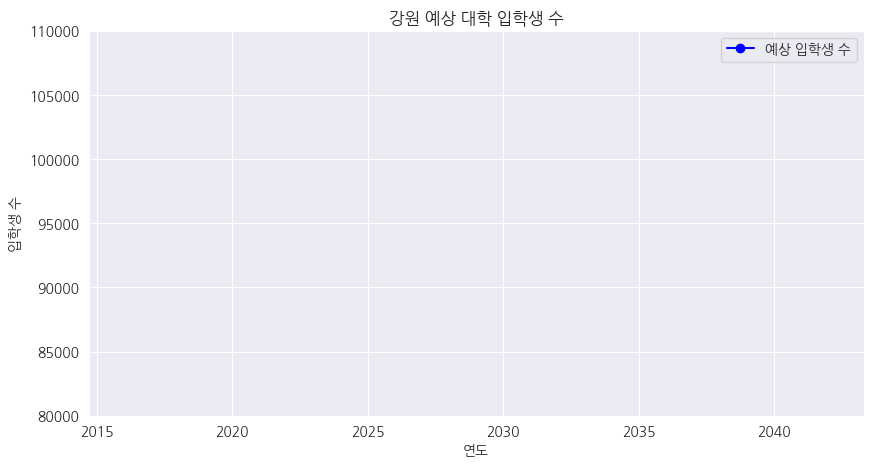

=== 경기 회귀 분석 결과 ===
회귀 계수: [ 0.05384974 -0.05802999  0.05100942]
절편: 73984.42969310097
R² 점수: 0.5631019043306078


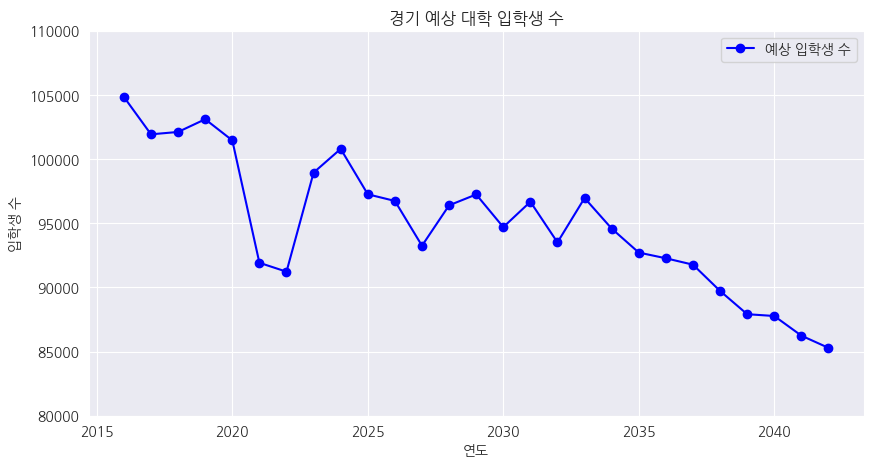

=== 경남 회귀 분석 결과 ===
회귀 계수: [ 0.02326533 -0.00366766  0.00947148]
절편: 5015.313515554759
R² 점수: 0.96400635662221


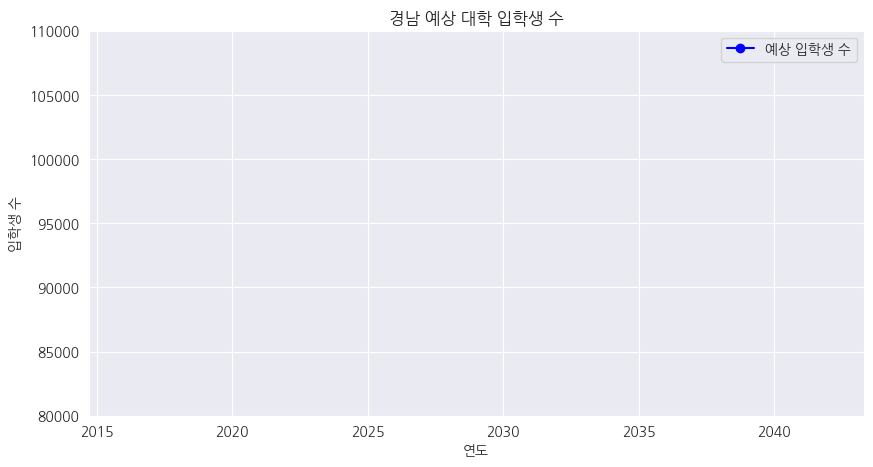

=== 경북 회귀 분석 결과 ===
회귀 계수: [ 0.02250187 -0.01130755  0.01495907]
절편: 24086.093603506808
R² 점수: 0.9038874519604388


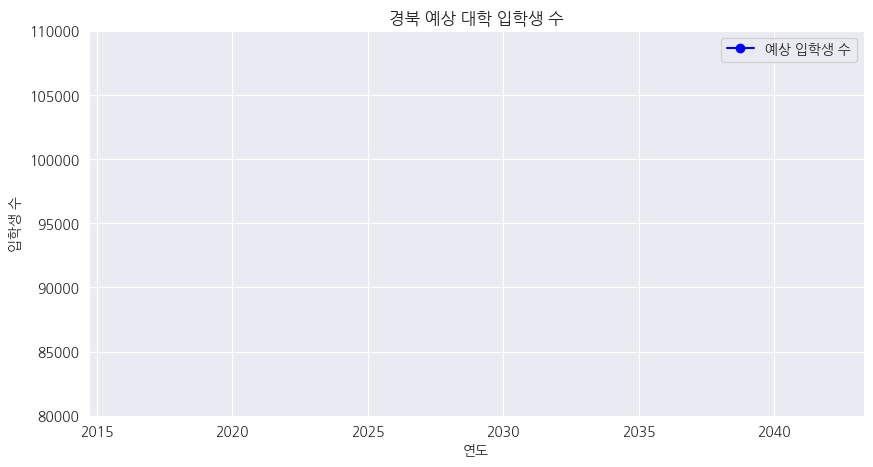

=== 광주 회귀 분석 결과 ===
회귀 계수: [ 0.01189182  0.00605603 -0.00620424]
절편: 14792.300709963967
R² 점수: 0.8253041991715937


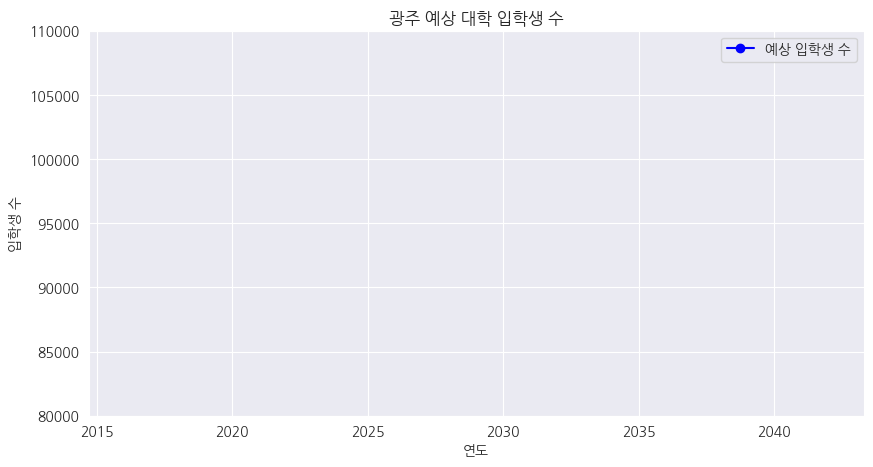

=== 대구 회귀 분석 결과 ===
회귀 계수: [ 0.00987043 -0.0063127   0.00534933]
절편: 20872.479669296346
R² 점수: 0.755715636200945


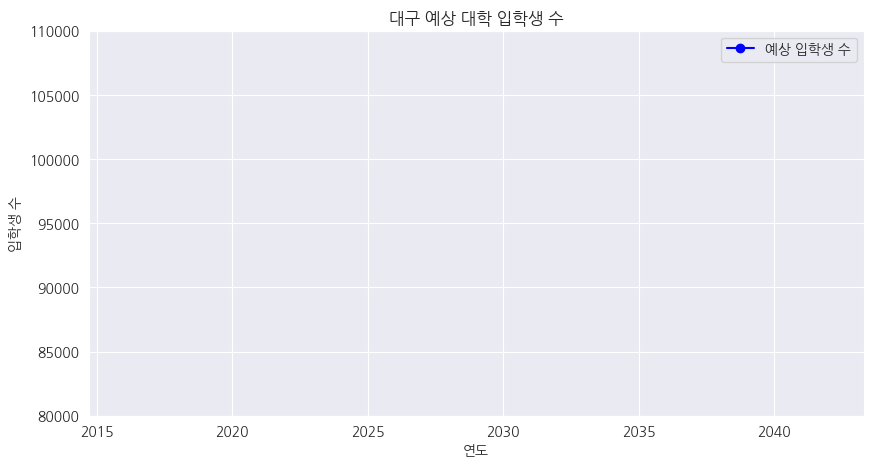

=== 대전 회귀 분석 결과 ===
회귀 계수: [ 0.02288101 -0.00383845  0.00229992]
절편: 14572.871669534634
R² 점수: 0.9444869147230867


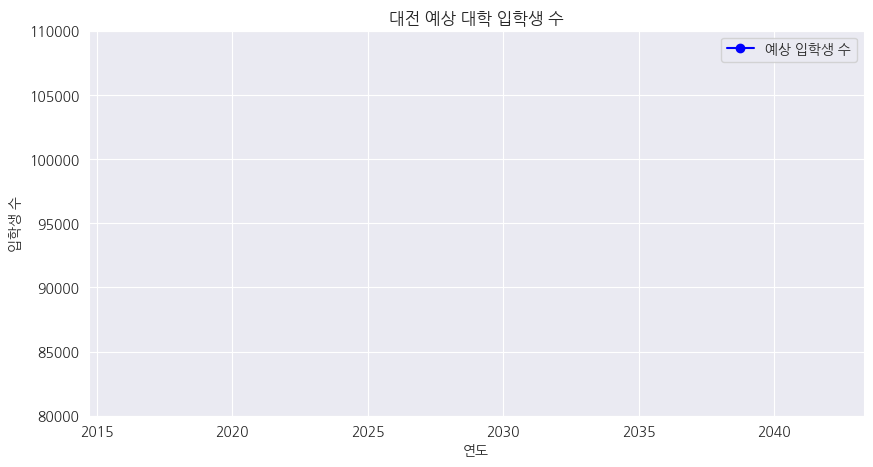

=== 부산 회귀 분석 결과 ===
회귀 계수: [0.03398286 0.00614112 0.00429887]
절편: 18814.87258259527
R² 점수: 0.9759130232247162


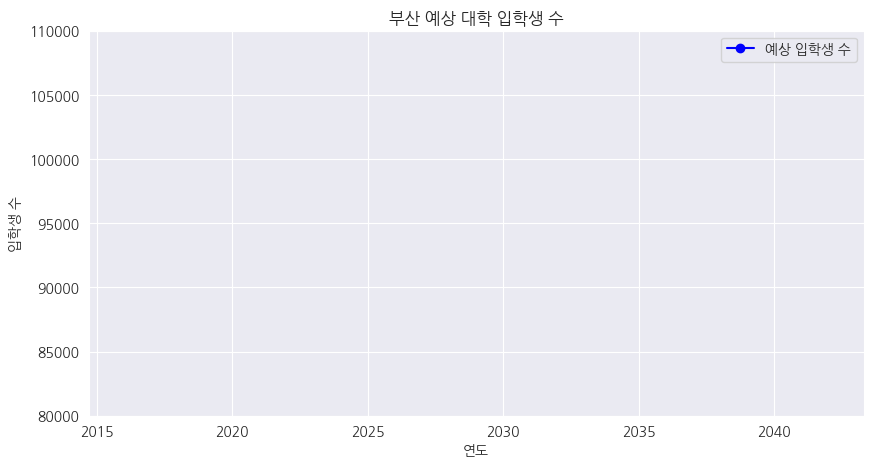

=== 서울 회귀 분석 결과 ===
회귀 계수: [ 0.00522933  0.0253011  -0.01784764]
절편: 94797.51680655619
R² 점수: 0.44835163269672584


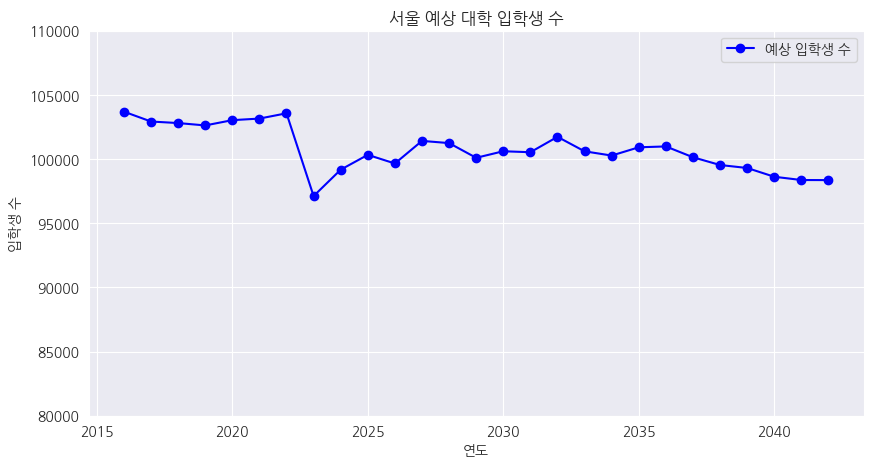

=== 울산 회귀 분석 결과 ===
회귀 계수: [ 0.00301217 -0.00157713 -0.00115176]
절편: 5965.41472490378
R² 점수: 0.7527975996174056


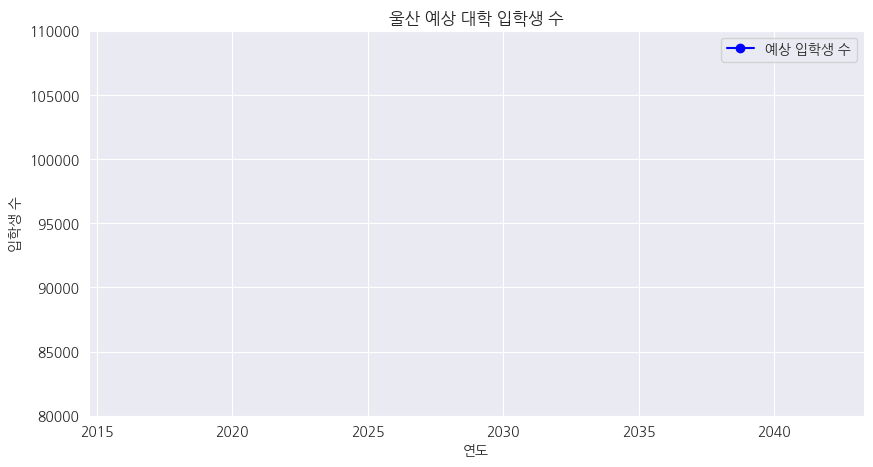

=== 인천 회귀 분석 결과 ===
회귀 계수: [ 0.00129909 -0.0038627   0.00294428]
절편: 14725.253718955779
R² 점수: 0.08719792552552119


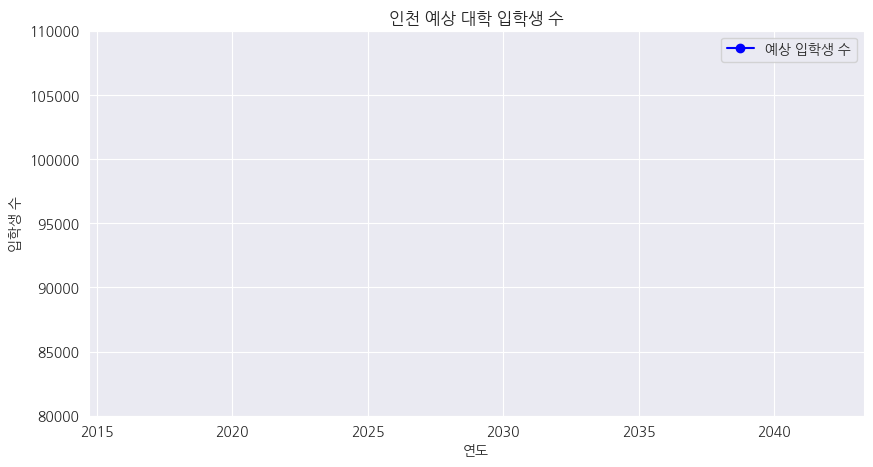

=== 전남 회귀 분석 결과 ===
회귀 계수: [0.01342815 0.00469854 0.00025658]
절편: 6005.261919881801
R² 점수: 0.9454146156845726


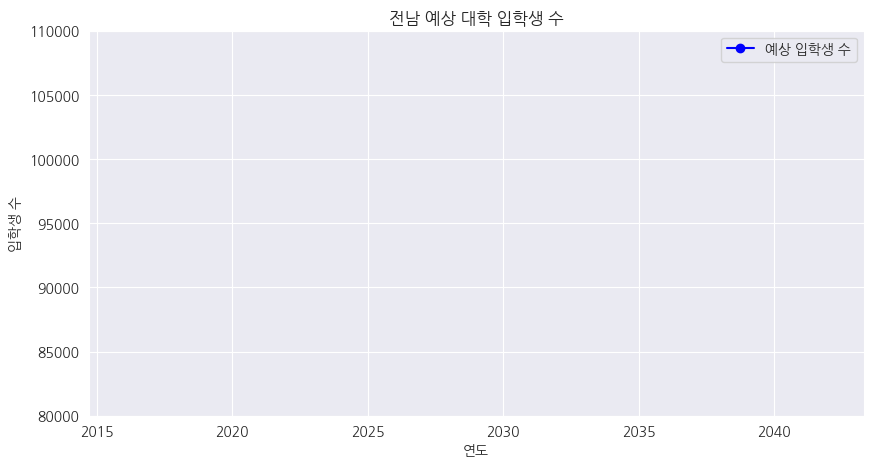

=== 전북 회귀 분석 결과 ===
회귀 계수: [ 0.01767906 -0.00214247  0.00360426]
절편: 11326.167035331837
R² 점수: 0.9137462646368365


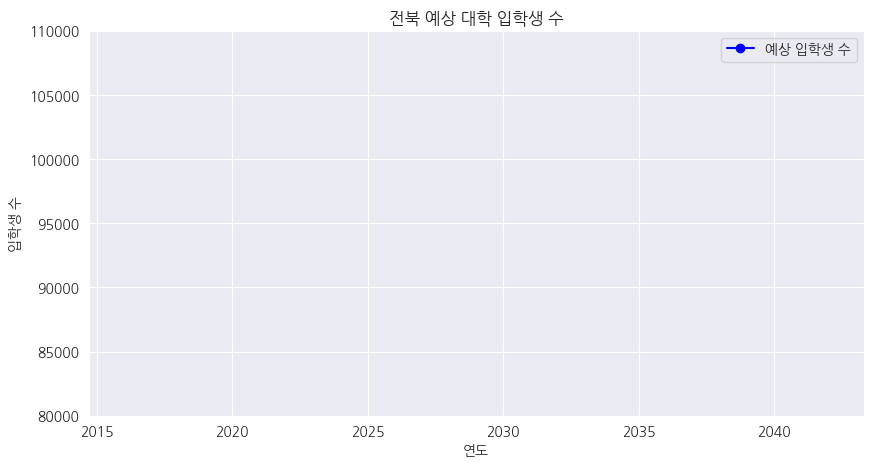

=== 제주 회귀 분석 결과 ===
회귀 계수: [ 0.00539443  0.00221861 -0.00062844]
절편: 1517.0341143859546
R² 점수: 0.954106107710428


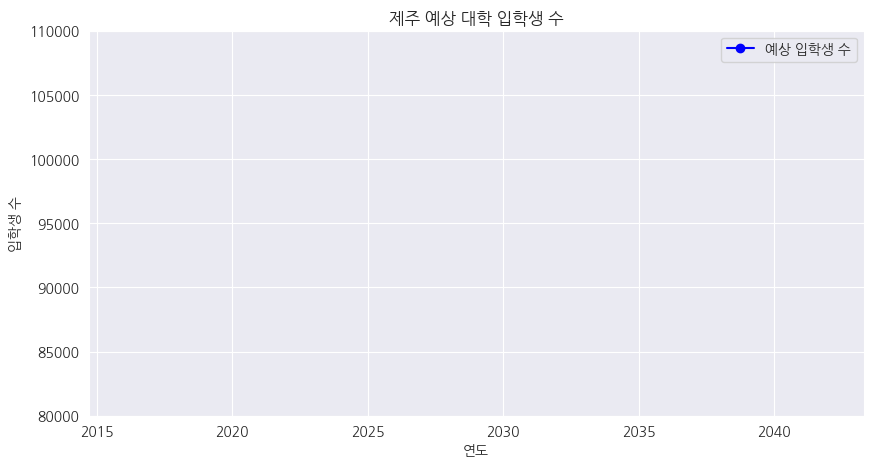

=== 충남 회귀 분석 결과 ===
회귀 계수: [ 0.01810501 -0.00238672  0.00222474]
절편: 24288.004531171384
R² 점수: 0.9826415954460421


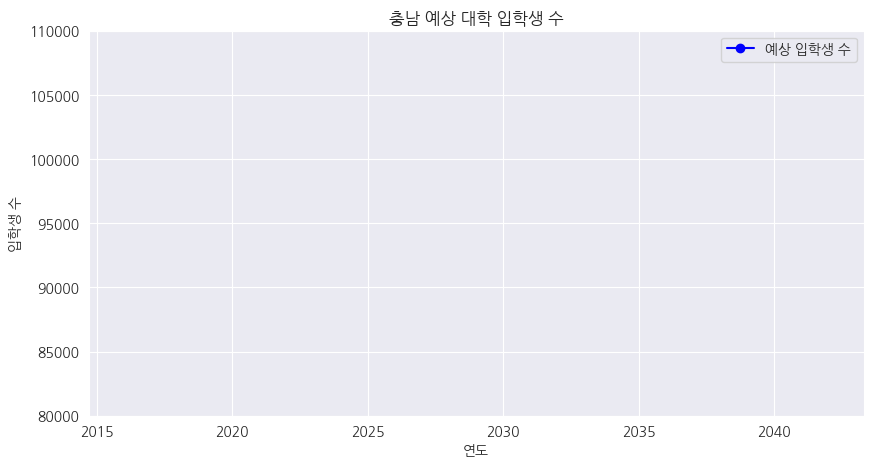

=== 충북 회귀 분석 결과 ===
회귀 계수: [ 0.01609855 -0.00184186  0.00779686]
절편: 10438.7698460793
R² 점수: 0.9336005226164718


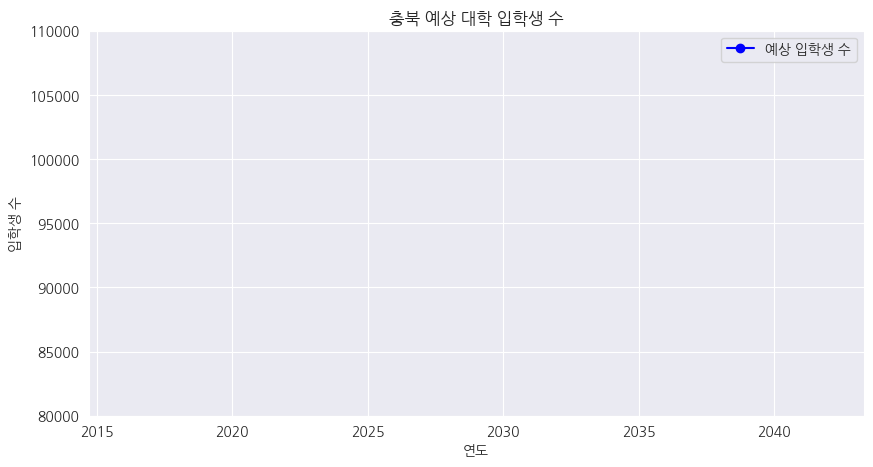

In [42]:
for sido, model in sido_models.items():
    # 기존 y 데이터 가져오기
    y_actual = df_sido_year_sum[(df_sido_year_sum['시도'] == sido) & (df_sido_year_sum['연도'] >= 2016)]['입학자수'].values

    # 예측 결과와 실제 데이터를 결합
    result = np.concatenate((y_actual, sido_predictions[sido]))

    # 연도 리스트 생성
    years = list(range(2016, 2016 + len(result)))

    # 그래프 생성
    plt.figure(figsize=(10, 5))
    plt.plot(years, result, marker='o', linestyle='-', color='b', label="예상 입학생 수")

    # 제목 및 축 레이블 추가
    plt.title(f"{sido} 예상 대학 입학생 수")
    plt.xlabel("연도")
    plt.ylabel("입학생 수")
# y축 범위 설정
    plt.ylim(80000, 110000)
    # 그리드 추가
    plt.grid(True)
    plt.legend()

    # 회귀 계수, 절편, R² 점수 출력
    print(f"=== {sido} 회귀 분석 결과 ===")
    print("회귀 계수:", model.coef_)
    print("절편:", model.intercept_)
    print("R² 점수:", model.score(X, y_actual))  # 기존 데이터를 사용한 R² 점수 계산
    print("=========================")

    # 그래프 표시
    plt.show()

In [14]:
for sido, model in sido_models.items():
    # 기존 y 데이터 가져오기
    y_actual = df_sido_year_sum[(df_sido_year_sum['시도'] == sido) & (df_sido_year_sum['연도'] >= 2016)]['입학자수'].values

    # 예측 결과와 실제 데이터를 결합
    result = np.concatenate((y_actual, sido_predictions[sido]))
    decrease_rate = ((result[8] - result[26]) / result[8]) * 100

# 출력
    print(f"{sido} 입학자 수 감소율: {decrease_rate:.2f}%")

강원 입학자 수 감소율: 34.05%
경기 입학자 수 감소율: 15.38%
경남 입학자 수 감소율: 34.03%
경북 입학자 수 감소율: 17.59%
광주 입학자 수 감소율: 8.30%
대구 입학자 수 감소율: 9.87%
대전 입학자 수 감소율: 17.88%
부산 입학자 수 감소율: 23.23%
서울 입학자 수 감소율: 0.82%
울산 입학자 수 감소율: -1.49%
인천 입학자 수 감소율: 3.94%
전남 입학자 수 감소율: 24.60%
전북 입학자 수 감소율: 19.47%
제주 입학자 수 감소율: 29.96%
충남 입학자 수 감소율: 10.23%
충북 입학자 수 감소율: 24.58%


In [31]:
import folium
import numpy as np

# 지도에 사용할 지역별 좌표 정보
locations = {
    "서울": (37.5665, 126.9780),
    "부산": (35.1796, 129.0756),
    "대구": (35.8714, 128.6014),
    "인천": (37.4563, 126.7052),
    "광주": (35.1595, 126.8526),
    "대전": (36.3504, 127.3845),
    "울산": (35.5384, 129.3114),
    "세종": (36.4800, 127.2890),
    "경기": (37.4138, 127.5183),
    "강원": (37.8228, 128.1555),
    "충북": (36.6356, 127.4913),
    "충남": (36.5184, 126.8000),
    "전북": (35.8175, 127.1116),
    "전남": (34.8161, 126.4629),
    "경북": (36.5745, 128.2043),
    "경남": (35.2383, 128.6922),
    "제주": (33.4996, 126.5312)
}

years = np.arange(2024, 2041)

base_radius = 40

# 지도 생성 및 저장
for year in years:
    m = folium.Map(location=[34.5, 127.5], zoom_start=7, width="100%", height="900px")
    for sido, predictions in sido_predictions.items():
        if sido in locations and len(predictions) >= (year - 2024):
            prediction = predictions[year - 2024]
            if year == 2024:
                radius = base_radius
            else:
                initial_value = predictions[0]
                decrease_ratio = (prediction / initial_value)**2
                radius = base_radius * decrease_ratio
            folium.CircleMarker(
                location=locations[sido],
                radius=radius,
                color='blue',
                fill=True,
                fill_color='blue',
                fill_opacity=0.6,
                popup=f"{sido} ({int(prediction)}명)"
            ).add_to(m)
    
    map_filename = f"university_map_prediction_{year}.html"
    m.save(map_filename)
    print(f"{year}년 지도가 {map_filename}로 저장되었습니다.")

2024년 지도가 university_map_prediction_2024.html로 저장되었습니다.
2025년 지도가 university_map_prediction_2025.html로 저장되었습니다.
2026년 지도가 university_map_prediction_2026.html로 저장되었습니다.
2027년 지도가 university_map_prediction_2027.html로 저장되었습니다.
2028년 지도가 university_map_prediction_2028.html로 저장되었습니다.
2029년 지도가 university_map_prediction_2029.html로 저장되었습니다.
2030년 지도가 university_map_prediction_2030.html로 저장되었습니다.
2031년 지도가 university_map_prediction_2031.html로 저장되었습니다.
2032년 지도가 university_map_prediction_2032.html로 저장되었습니다.
2033년 지도가 university_map_prediction_2033.html로 저장되었습니다.
2034년 지도가 university_map_prediction_2034.html로 저장되었습니다.
2035년 지도가 university_map_prediction_2035.html로 저장되었습니다.
2036년 지도가 university_map_prediction_2036.html로 저장되었습니다.
2037년 지도가 university_map_prediction_2037.html로 저장되었습니다.
2038년 지도가 university_map_prediction_2038.html로 저장되었습니다.
2039년 지도가 university_map_prediction_2039.html로 저장되었습니다.
2040년 지도가 university_map_prediction_2040.html로 저장되었습니다.


In [33]:
import glob
import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output

html_files = glob.glob("university_map_prediction_*.html")
html_files.sort()

years = [file.split("_")[-1].split(".")[0] for file in html_files]

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("연도별 대학교 입학생 수 예측 변화", style={'textAlign': 'center'}),
    html.Div(id='year-display', style={'textAlign': 'center', 'fontSize': 24, 'marginBottom': '20px'}),
    dcc.Interval(
        id='interval-component',
        interval=2500, 
        n_intervals=0
    ),
    html.Iframe(
        id='iframe',
        srcDoc=open(html_files[0], 'r').read(),
        width='100%',
        height='600'
    )
])

@app.callback(
    [Output('iframe', 'srcDoc'),
     Output('year-display', 'children'),
     Output('interval-component', 'disabled')],
    [Input('interval-component', 'n_intervals')]
)
def update_map(n_intervals):
    index = n_intervals % len(html_files)
    current_file = html_files[index]
    current_year = years[index]
    stop = n_intervals >= len(html_files) - 1  # 마지막 파일 이후 멈춤
    
    return open(current_file, 'r').read(), f"현재 연도: {current_year}", stop

if __name__ == '__main__':
    app.run_server(debug=True, port=8004)

In [17]:
print(total_df)

[561050.         546960.         540472.         540593.
 535093.         499877.         497405.         494312.
 501568.         501000.76709757 494594.74890341 490305.64961024
 503258.66199321 499597.82843948 491466.66052085 500167.82192552
 493285.95460756 501324.81136837 488205.00831601 483647.69104397
 481424.77008897 472941.66073625 459092.93367058 448800.21518188
 443302.26149107 434401.22848821 429740.56518892]


In [18]:
data = np.round(total_df).astype(int)
years = np.arange(2016, 2016 + len(data))
df_students = pd.DataFrame({"연도": years, "입학생 수": data}).set_index("연도")
tools.display_dataframe_to_user("h", df_students)

h


In [19]:
medical_admission = pd.read_csv('/Users/leejeje/Desktop/2024 겨울학기/Data Science Lab/EDA Project/Datasets/Data_Major/Medical_Admission_data.csv', encoding='utf-8')

In [20]:
medical_admission = medical_admission[(medical_admission['Year'] >= 2016) & (medical_admission['Year'] <= 2023)]
medical_enrollment = medical_admission["Total_Enrollment"].values
print("medical_enrollment =", medical_enrollment)

medical_enrollment = [2421 2421 2701 3067 3084 3099 3136 3148]


In [21]:
total_enrollment = df_students["입학생 수"].values
print("total_enrollment =", total_enrollment)

total_enrollment = [561050 546960 540472 540593 535093 499877 497405 494312 501568 501001
 494595 490306 503259 499598 491467 500168 493286 501325 488205 483648
 481425 472942 459093 448800 443302 434401 429741]


In [22]:
medical_enrollment = np.pad(medical_enrollment, (0, len(total_enrollment) - len(medical_enrollment)), constant_values=3148)
print("medical_enrollment =", medical_enrollment)


medical_enrollment = [2421 2421 2701 3067 3084 3099 3136 3148 3148 3148 3148 3148 3148 3148
 3148 3148 3148 3148 3148 3148 3148 3148 3148 3148 3148 3148 3148]


In [23]:
years = np.arange(2016, 2043)
print(len(years))
medical_ratio = medical_enrollment / total_enrollment
print(len(medical_ratio))
medical_ratio_percentage = medical_ratio * 100
print(len(total_enrollment))
print(len(medical_enrollment))
print(len(medical_ratio_percentage))

# 데이터프레임 생성
df_medical_ratio = pd.DataFrame({
    "Year": years,
    "대학교학생_입학생수": total_enrollment,
    "Total_Enrollment": medical_enrollment,
    "Medical_Ratio": medical_ratio,
    "Medical_Ratio_Percentage": medical_ratio_percentage
})

tools.display_dataframe_to_user(name="연도별 의대 입학생 비율", dataframe=df_medical_ratio)

27
27
27
27
27
연도별 의대 입학생 비율
